In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('images/train/angry/0.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
img.shape

(48, 48, 3)

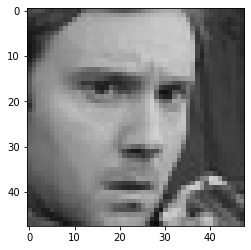

In [4]:
plt.imshow(img)

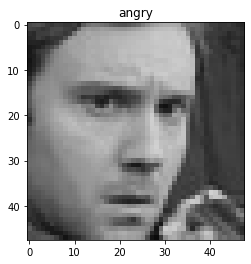

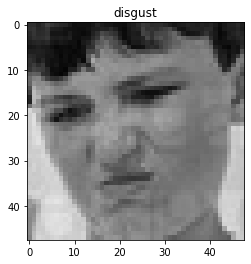

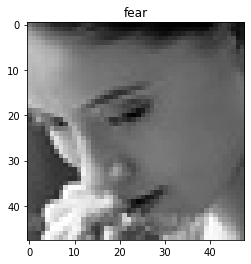

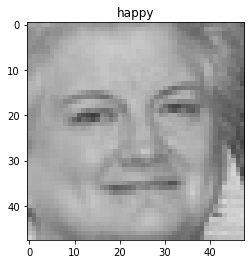

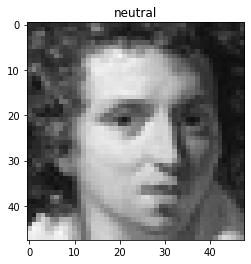

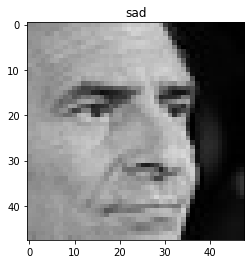

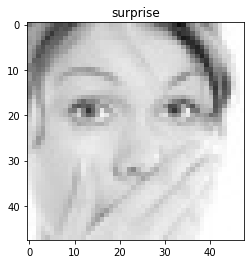

In [5]:
DataDirectory= './images/train/'
Classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
for category in Classes:
  path = os.path.join(DataDirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.title(category)
    plt.show()
    break

## Imagenet work better with 224x224, so we are changing the size

In [6]:
img_size=224
new_img = cv2.resize(img, (img_size, img_size))
plt.imshow(new_img)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [7]:
training_Data = []

def create_training_data():
  for category in Classes:
    path = os.path.join(DataDirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
      try:
        img_array= cv2.imread(os.path.join(path, img))
        new_img = cv2.resize(img_array, (img_size, img_size))
        training_Data.append([new_img, class_num])
      except Exception as e:
        pass

In [8]:
create_training_data()

In [9]:
import random
random.shuffle(training_Data)

In [10]:
x = []
y = []

for features, label in training_Data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)
# x = np.array(x)

In [11]:
x.shape

(28821, 224, 224, 3)

In [12]:
x = x[:10000]
x = x/255.0

In [13]:
y= np.array(y)
y.shape

(28821,)

In [14]:
y=y[:10000]

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.MobileNetV2()

In [17]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

### Transfer learning- tuning, weights will start from last check point

In [18]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [19]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [20]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_ouput)

In [21]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [22]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [23]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [24]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
new_model.fit(x,y, epochs=15)

Epoch 1/15
313/313 [==============================] - 1042s 3s/step - loss: 1.3503 - accuracy: 0.4802
Epoch 2/15
313/313 [==============================] - 1140s 4s/step - loss: 1.1599 - accuracy: 0.5616
Epoch 3/15
313/313 [==============================] - 890s 3s/step - loss: 1.0677 - accuracy: 0.5943
Epoch 4/15
313/313 [==============================] - 887s 3s/step - loss: 1.0028 - accuracy: 0.6249
Epoch 5/15
313/313 [==============================] - 895s 3s/step - loss: 0.9251 - accuracy: 0.6490
Epoch 6/15
313/313 [==============================] - 875s 3s/step - loss: 0.8656 - accuracy: 0.6831
Epoch 7/15
313/313 [==============================] - 854s 3s/step - loss: 0.8044 - accuracy: 0.7007
Epoch 8/15
313/313 [==============================] - 849s 3s/step - loss: 0.7363 - accuracy: 0.7315
Epoch 9/15
313/313 [==============================] - 953s 3s/step - loss: 0.6831 - accuracy: 0.7507
Epoch 10/15
313/313 [==============================] - 1307s 4s/step - loss: 0.6373 - acc

In [26]:
new_model.save('my_model_64p35.h5')

In [3]:
new_model = tf.keras.models.load_model('my_model_64p35.h5')

In [3]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
# img_happy = cv2.imread('happy.jpg')
# img_happy.shape

img_happy = cv2.imread('myface.jpg')
img_happy.shape

(4224, 2376, 3)

In [5]:
img_happy = cv2.resize(img_happy, (225, 400))

In [6]:
img_happy.shape

(400, 225, 3)

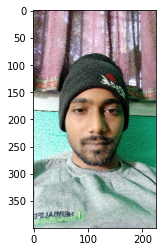

In [7]:
img_happy = cv2.cvtColor(img_happy, cv2.COLOR_BGR2RGB)
plt.imshow(img_happy)

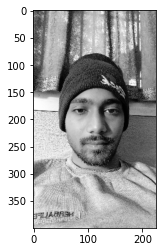

In [8]:
gray_happy = cv2.cvtColor(img_happy, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_happy, cmap='gray')

In [9]:
faces = faceCascade.detectMultiScale(gray_happy, 1.1, 4)
for x,y,w,h in faces:
  roi_gray = gray_happy[y:y+h, x:x+w]
  roi_color = img_happy[y:y+h, x:x+w]
  cv2.rectangle(img_happy, (x, y), (x+w, y+h), (255, 0, 0), 2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(facess) == 0:
    print('Face not detected')
  else:
    for(ex, ey, ew, eh) in facess:
      face_roi = roi_color[ey:ey+eh, ex: ex+ew]

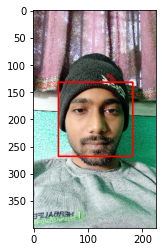

In [10]:
plt.imshow(img_happy)

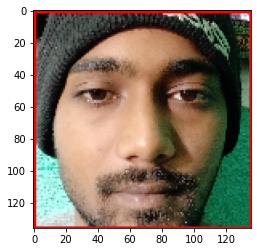

In [11]:
plt.imshow(roi_color)

In [12]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [13]:
Prediction = new_model.predict(final_image)
Prediction[0]

NameError: name 'new_model' is not defined

In [48]:
Classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [50]:
Classes[Prediction[0].argmax()]

'happy'